# **Machine Learning Group Project:** Data Exploration and Feature Engineering 

Make sure to **only run this notebook once the previous notebooks [a_csv_creation.ipynb](a_csv_creation.ipynb) and [b_recommender_system.ipynb](b_recommender_system.ipynb) have been run at least once.** 

If those notebooks have both been run at least once, the kernel may be restarted before running this in order to obtain better performance and vaster machine memory.

## Importing Packages 

In [2]:
import ast
import csv
import datetime
import pandas as pd
import numpy as np
from datetime import datetime

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# From sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, mean_squared_error
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, KBinsDiscretizer, OrdinalEncoder

## Reading DataFrame

In [ ]:
# Import the final DataFrame
final_df = pd.read_csv("data/final_df.csv")

# Import the Similarity DataFrame
similarity_df = pd.read_csv("data/content_base.csv", index_col = "name")

In [ ]:
# Rearrange Columns
final_df = final_df.reindex(columns = ["review_id", "y", "date", "funny", "helpful",
                                       "app_id", "title", "date_release", "rating", 
                                       "positive_ratio", "user_reviews", "win", "mac", "linux", 
                                       "price_final", "price_original", "discount", "description",
                                       "tags", 'english', 'developer', 'publisher', 'required_age', 
                                       'genres', 'steamspy_tags','achievements', 'average_playtime', 
                                       'median_playtime', "owners", "steam_deck",
                                       "user_id", "products", "reviews", "hours"])

# Sort by Review ID
final_df.sort_values(by=["review_id"], inplace = True)

In [43]:
final_df.head(3)

,review_id,y,date,funny,helpful,app_id,title,date_release,rating,positive_ratio,...,steamspy_tags,achievements,average_playtime,median_playtime,owners,steam_deck,user_id,products,reviews,hours
0,1,False,2017-02-17,0,4,304390,FOR HONOR™,2017-02-13,Mixed,68,...,Medieval;Action;Swordplay,0,951,696,2000-5000,True,1098,269,1,11.5
174074,5,True,2021-10-10,0,0,306130,The Elder Scrolls® Online,2017-05-22,Very Positive,83,...,RPG;Open World;MMORPG,0,10659,3143,1000-2000,True,17622,15,4,8.6
355245,6,True,2017-11-25,0,0,238960,Path of Exile,2013-10-23,Very Positive,87,...,Free to Play;Action RPG;Hack and Slash,120,5263,492,10000-20000,True,33969,273,1,538.8


## Data Exploration

Having imported the final DataFrame, we explore its structure and data composition.

In [44]:
# Number of Observations and Features
print(f"The final dataset has \033[1m{final_df.shape[0]} observations\033[0m and \033[1m{final_df.shape[1]} features.\033[0m")

# Number of Missing Valyes
print(f"The final dataset has \033[1m{final_df.isna().sum().sum()} NaN entries.\033[0m")


The final dataset has 6564923 observations and 34 features.
The final dataset has 0 NaN entries.


In [45]:
# General DataFrame Description
final_df.describe(percentiles=[.1, .25, .5, .75, .9]).round(2).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
review_id,6564923.0,5136968.74,2967648.97,1.0,1024397.2,2559700.00,5120629.00,7756637.50,9286506.60,10072269.00
funny,6564923.0,1.39,48.06,0.0,0.0,0.00,0.00,0.00,0.00,28088.00
helpful,6564923.0,3.46,58.34,0.0,0.0,0.00,0.00,0.00,3.00,29627.00
app_id,6564923.0,333103.39,185197.05,70.0,49520.0,238960.00,294100.00,431960.00,594650.00,1032430.00
positive_ratio,6564923.0,87.83,7.84,44.0,78.0,83.00,88.00,94.00,97.00,98.00
user_reviews,6564923.0,415855.42,1132509.05,174.0,21086.0,52226.00,105614.00,204840.00,722973.00,6941137.00
price_final,6564923.0,21.18,15.57,0.0,0.0,9.99,19.99,29.99,39.99,59.99
price_original,6564923.0,22.42,16.51,0.0,0.0,9.99,19.99,29.99,39.99,109.99
discount,6564923.0,4.32,17.51,0.0,0.0,0.00,0.00,0.00,0.00,90.00
english,6564923.0,1.00,0.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00


In [46]:
final_df.dtypes

review_id             int64
y                      bool
date                 object
funny                 int64
helpful               int64
app_id                int64
title                object
date_release         object
rating               object
positive_ratio        int64
user_reviews          int64
win                    bool
mac                    bool
linux                  bool
price_final         float64
price_original      float64
discount            float64
description          object
tags                 object
english               int64
developer            object
publisher            object
required_age          int64
genres               object
steamspy_tags        object
achievements          int64
average_playtime      int64
median_playtime       int64
owners               object
steam_deck             bool
user_id               int64
products              int64
reviews               int64
hours               float64
dtype: object

#### Target Variable Exploration

First we explore the distribution of our target variable _y_, which is a column of booleans which signal whether a given user would recommend a given game or not.

In creating a countplot, we find that the dataset is rather unbalanced. Only 14.12% of observations is negative, while the remaining 85.88% is positive. This will certainly be kept in consideration when training our model, as the unbalance must be offset. With a quick calculation, we find that the ratio of positives to negatives is 6.08 approximately.

<Figure size 1000x500 with 0 Axes>

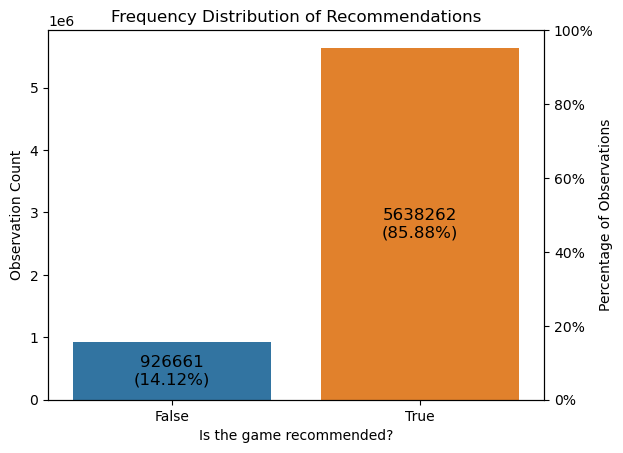

In [47]:
# Plotting the frequency distribution of number of recommendations
plt.figure(figsize=(10, 5))
plt.figure(dpi=100)

ax = sns.countplot(x='y', data=final_df)

plt.title('Frequency Distribution of Recommendations')
plt.xlabel('Is the game recommended?')
plt.ylabel('Observation Count')

# Calculate percentage of each category
percentages = final_df['y'].value_counts(normalize=True) * 100

# Annotate the bars with counts and percentages
for p in ax.patches:
    count = int(p.get_height())
    percentage = percentages.sort_values()[int(p.get_x() + p.get_x())]
    ax.annotate(f'{count}\n({percentage:.2f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black')

# Add percentage axis
ax2 = ax.twinx()
ax2.set_ylim(0, 100)
ax2.set_ylabel('Percentage of Observations')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [48]:
print("The \033[1mratio of positive to negative recommendations\033[0m is", 
     final_df['y'].value_counts()[0] / final_df['y'].value_counts()[1])

The ratio of positive to negative recommendations is 6.084492603012321


#### Steam Rating Exploration

Reamining within the realm of ratings, we explore the distribution of the Steam rating system through a frequency table. Very interestingly, we observe that many of the rating categories are not in fact present in our data. It would seem that there are no games with overall negative reviews, while most games either have a _Very Positive_ or _Overwhelmingly Positive_ rating (appr. 86.24%). All in all, this is in line with the previous observation concerning the unbalanced dataset. 

Another noteworthy aspect of the dataset is that there are no _Positive_ reviews. The remaining 13.76% is split between _Mostly Positive_ and _Mixed_, with the former counting more observation than the latter. It is worth remembering that the Steam rating system assigns the _Positive_ rating to games that seem to have good ratings, but a review count which is not high enough to really "consacrate" its status as a very positively (or overwhlemingly positively) rated game. This perhaps informs us on the type of game which tends to be included in these datasets, focusing on larger more "mainstream" products rather than smaller lesser-known ones.

In [49]:
# Create a frequency table
rating_counts = pd.DataFrame(final_df['rating'].value_counts())

# Rename the columns
rating_counts.columns = ['Observation Count']

# Sort the rows based on the order of rating categories
rating_order = ["Overwhelmingly Positive", "Very Positive", "Positive", 
                "Mostly Positive", "Mixed", "Mostly Negative", 
                "Negative", "Very Negative", "Overwhelmingly Negative"]

rating_counts = rating_counts.reindex(rating_order)

# Fill NaN with 0
rating_counts.fillna(0, inplace = True)

# Add a column for percentage of observations
rating_counts['Percentage of Observations'] = rating_counts['Observation Count'] / len(final_df) * 100

# Format the percentage column
rating_counts['Percentage of Observations'] = rating_counts['Percentage of Observations'].map('{:.2f}%'.format)

# Turn to Integer
rating_counts["Observation Count"] = [int(i) for i in rating_counts["Observation Count"]]

display(rating_counts)

,Observation Count,Percentage of Observations
Overwhelmingly Positive,1559085,23.75%
Very Positive,4102406,62.49%
Positive,0,0.00%
Mostly Positive,751426,11.45%
Mixed,152006,2.32%
Mostly Negative,0,0.00%
Negative,0,0.00%
Very Negative,0,0.00%
Overwhelmingly Negative,0,0.00%


#### Owners Exploration

AAAAA

<Figure size 1000x500 with 0 Axes>

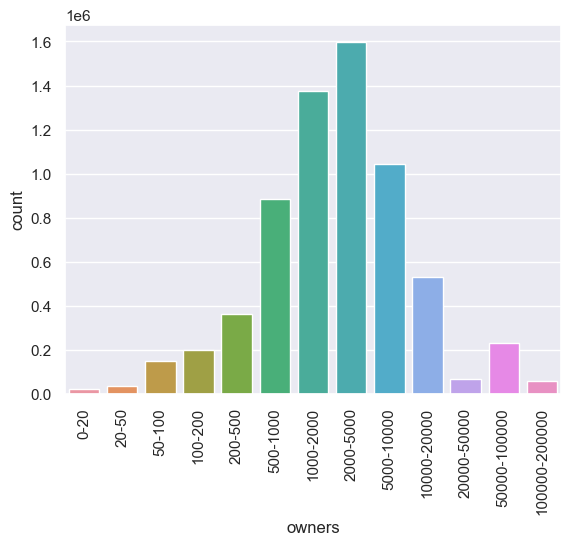

In [51]:
# Create Order
order_list = ["0-20", "20-50", "50-100", "100-200", "200-500", 
              "500-1000", "1000-2000", "2000-5000", "5000-10000", 
              "10000-20000", "20000-50000", "50000-100000", "100000-200000"]

# Plotting the frequency distribution of number of recommendations
sns.set_theme()
plt.figure(figsize=(10, 5))
plt.figure(dpi=100)
plt.xticks(rotation=90)

ax = sns.countplot(x='owners', data=final_df,
                  order = order_list)

**Correlation Matrix**

/var/folders/gs/xnyw__p94xl1dp76b2zhm0yw0000gn/T/ipykernel_57300/343985717.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyze['rating'] = df_analyze['rating'].map(rating_map)
/var/folders/gs/xnyw__p94xl1dp76b2zhm0yw0000gn/T/ipykernel_57300/343985717.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyze['y'] = df_analyze['y'].map({True: 1, False: 0})


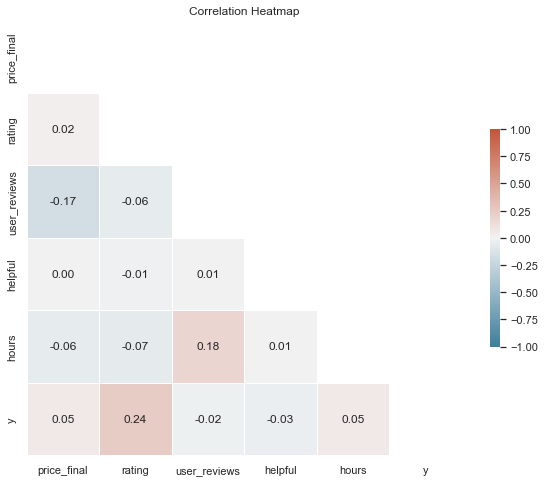

In [35]:
# correlations between different variables, such as price and rating, user reviews and helpful votes, or hours played and recommendation status.

df_analyze = final_df[['price_final', 'rating', 'user_reviews', 'helpful', 'hours', 'y']]

# Convert rating column to numerical values
rating_map = {'Overwhelmingly Positive': 5,
            'Very Positive': 4,
            'Mostly Positive': 3,
            'Mixed': 2,
            'Mostly Negative': 1,
            'Very Negative': 0}

df_analyze['rating'] = df_analyze['rating'].map(rating_map)

# Convert is_recommended column to binary values
df_analyze['y'] = df_analyze['y'].map({True: 1, False: 0})

# Calculate the correlation matrix
corr_matrix = df_analyze.corr()

# Setting seaborn style
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(10, 8))


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


As expected, be observe the strongest positive correlations between y (recommendation status) and rating and user_reviews and hours. Hours and y (recommendation status) are also slightly correlated.
The final price seems to have a negative influence on user_reviews and the rating.

**Frequency Distribution of Final Prices**

<Figure size 720x360 with 0 Axes>

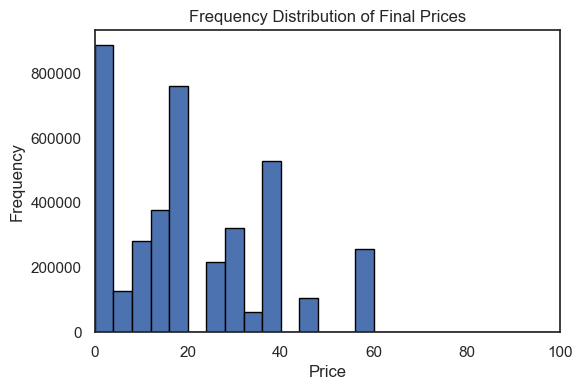

In [84]:
# frequency distribution of final prices

plt.figure(figsize=(10, 5))
plt.figure(dpi=100)
plt.hist(final_df['price_final'], bins=25, edgecolor='black', range=(0, 100))
plt.title('Frequency Distribution of Final Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

**Boxplot of Final Prices**

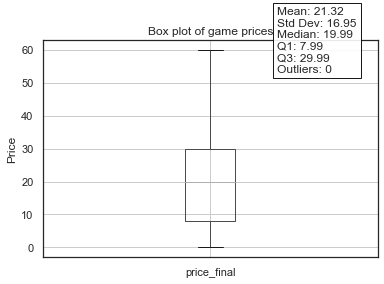

In [85]:
# boxplot of final price

ax = final_df.boxplot('price_final')

ax.set_ylabel('Price')
ax.set_title('Box plot of game prices')

stats = final_df['price_final'].describe()
mean = final_df['price_final'].mean()
std_dev = final_df['price_final'].std()

# calculate outliers
q1 = stats['25%']
q3 = stats['75%']
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = final_df[(final_df['price_final'] < lower_bound) | (final_df['price_final'] > upper_bound)]['price_final']
num_outliers = outliers.count()

# add statistics to the plot
ax.text(0.7, 0.85, f"Mean: {mean:.2f}\nStd Dev: {std_dev:.2f}\nMedian: {stats['50%']:.2f}\nQ1: {stats['25%']:.2f}\nQ3: {stats['75%']:.2f}\nOutliers: {num_outliers}",
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', alpha=0.9))


plt.show()


**Frequency Distribution of Rating**

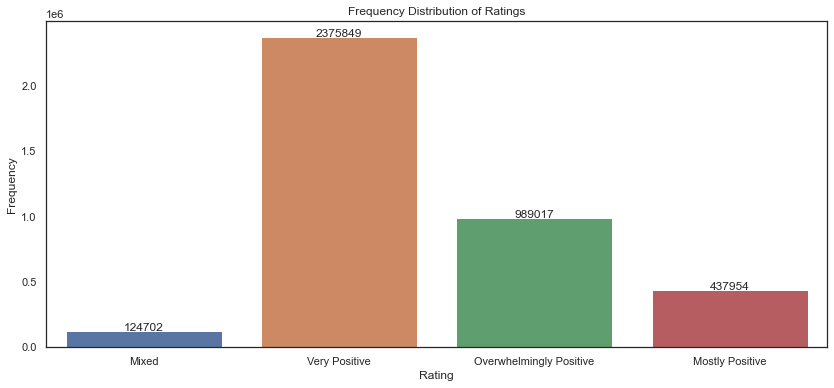

In [37]:
# Plotting the frequency distribution of rating

plt.figure(figsize=(14, 6))
ax = sns.countplot(x='rating', data=final_df)

plt.title('Frequency Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

**Compatibility of Windows, Mac and Linux**

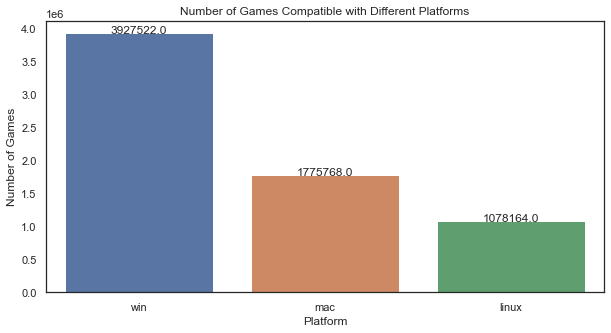

In [39]:
# compatibility with different platforms

# Calculating the number of games compatible with each platform
platform_counts = final_df[['win', 'mac', 'linux']].sum().reset_index()
platform_counts.columns = ['Platform', 'Count']

plt.figure(figsize=(10, 5))

ax = sns.barplot(x='Platform', y='Count', data=platform_counts)

plt.title('Number of Games Compatible with Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Games')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [40]:
# Calculate the number of games supporting each combination of platforms (windows, mac, linux)

win_only = ((final_df['win'] == True) & (final_df['mac'] == False) & (final_df['linux'] == False)).sum()
win_mac = ((final_df['win'] == True) & (final_df['mac'] == True) & (final_df['linux'] == False)).sum()
win_linux = ((final_df['win'] == True) & (final_df['mac'] == False) & (final_df['linux'] == True)).sum()
win_mac_linux = ((final_df['win'] == True) & (final_df['mac'] == True) & (final_df['linux'] == True)).sum()
mac_only = ((final_df['win'] == False) & (final_df['mac'] == True) & (final_df['linux'] == False)).sum()
linux_only = ((final_df['win'] == False) & (final_df['mac'] == False) & (final_df['linux'] == True)).sum()

print(f"Number of games supporting only Windows: {win_only}")
print(f"Number of games supporting Windows and Mac: {win_mac}")
print(f"Number of games supporting Windows and Linux: {win_linux}")
print(f"Number of games supporting Windows, Mac, and Linux: {win_mac_linux}")
print(f"Number of games supporting only Mac: {mac_only}")
print(f"Number of games supporting only Linux: {linux_only}")

Number of games supporting only Windows: 2079743
Number of games supporting Windows and Mac: 769615
Number of games supporting Windows and Linux: 72011
Number of games supporting Windows, Mac, and Linux: 1006153
Number of games supporting only Mac: 0
Number of games supporting only Linux: 0


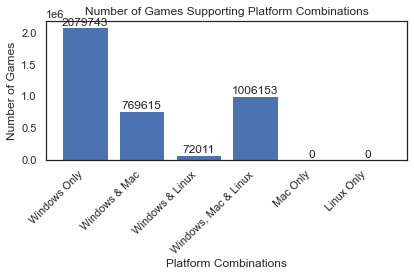

In [41]:
# Platform combinations and their counts

platform_combinations = {
    "Windows Only": win_only,
    "Windows & Mac": win_mac,
    "Windows & Linux": win_linux,
    "Windows, Mac & Linux": win_mac_linux,
    "Mac Only": mac_only,
    "Linux Only": linux_only,
}

fig, ax = plt.subplots()
ax.bar(platform_combinations.keys(), platform_combinations.values())

# Add the counts above the bars
for i, (combination, count) in enumerate(platform_combinations.items()):
    ax.text(i, count + 10, f"{count}", ha='center', va='bottom')

ax.set_title("Number of Games Supporting Platform Combinations")
ax.set_xlabel("Platform Combinations")
ax.set_ylabel("Number of Games")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Windows definitly dominates, when it comes to the number of games it supports. Most developers only develop for windows. However, there are still many games which run on windows, mac and linux. These results tell us that we should consider a users operating system, when recommending a game based on a user_id.

**Most popular Tags and Genres**

In [42]:
# Read the data
final_df = pd.read_csv("data/final_df.csv")

# Split and count steamspy_tags and genres
steamspy_tags = final_df['steamspy_tags'].str.split(';', expand=True).stack().value_counts()
genres = final_df['genres'].str.split(';', expand=True).stack().value_counts()

# Print the most common steamspy_tags and genres
print("Most common steamspy_tags:\n", steamspy_tags.head(10))
print("\nMost common genres:\n", genres.head(10))

# Combine the split steamspy_tags and genres back into the DataFrame
final_df['steamspy_tags'] = final_df['steamspy_tags'].str.split(';')
final_df['genres'] = final_df['genres'].str.split(';')

# Calculate game popularity metrics, sales, and price_final
final_df['average_playtime'] = final_df['average_playtime'].astype(float)
final_df['reviews'] = final_df['reviews'].astype(int)
final_df['price_final'] = final_df['price_final'].astype(float)

# Group by steamspy_tags and genres, and calculate the average popularity, sales metrics, and price_final
tags_popularity = final_df.explode('steamspy_tags').groupby('steamspy_tags').agg({
    'average_playtime': 'mean',
    'reviews': 'sum',
    'price_final': 'mean'
}).sort_values('reviews', ascending=False)

genres_popularity = final_df.explode('genres').groupby('genres').agg({
    'average_playtime': 'mean',
    'reviews': 'sum',
    'price_final': 'mean'
}).sort_values('reviews', ascending=False)

# Print the popularity, sales metrics, and price_final for the most common steamspy_tags and genres
print("\nPopularity, sales metrics, and price_final by steamspy_tags:\n", tags_popularity.head(10))
print("\nPopularity, sales metrics, and price_final by genres:\n", genres_popularity.head(10))


Most common steamspy_tags:
 Multiplayer     1306846
Open World       975555
Survival         709232
Free to Play     528619
Simulation       485486
Early Access     434366
Action           410372
RPG              406981
FPS              373718
Strategy         356269
dtype: int64

Most common genres:
 Action                   2317164
Adventure                1352712
Indie                    1274129
Simulation               1245893
RPG                      1180447
Massively Multiplayer     871115
Strategy                  813447
Free to Play              701041
Early Access              434366
Sports                    182598
dtype: int64

Popularity, sales metrics, and price_final by steamspy_tags:
                average_playtime  reviews  price_final
steamspy_tags                                        
Multiplayer        10551.283588  2211400    18.785185
Open World          5465.449322  1658514    24.866857
Survival            7628.942128  1200746    28.686975
Free to Play        5

Games with the tags "multiplayer", "open world", "survival", "free to play" and "simulation" are the most popular ones based on the number of tags. 

The most popular genres are "action", "adventure", " indie", "simulation" and "RPG".

The tags "FPS" and "multiplayer" lead to the longest average playtime. 
Games with the tags "mulitplayer" and "open world" have the most reviews. 
Games with the tags "RPG" and "Survial" have the higest final price.

Among genres, "free to play" has the highest average playtime. "Action" has the most reviews and "strategy" the highest final price.

**Trends in game releases, user reviews, and ratings over time**

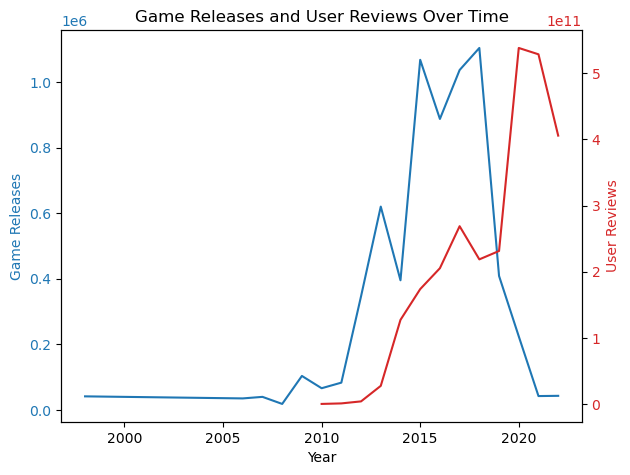

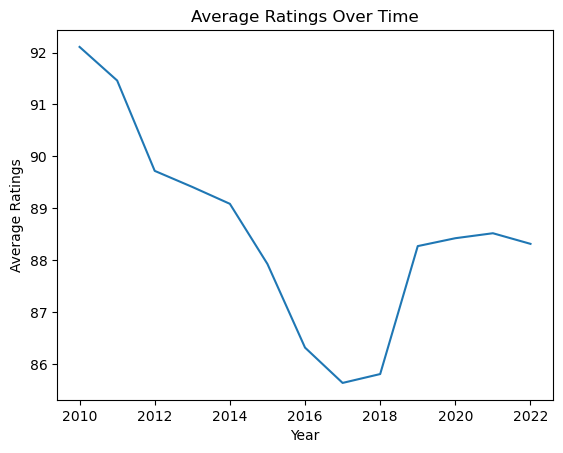

In [10]:
# Trends in game releases, user reviews, and ratings over time

final_df['date_release'] = pd.to_datetime(final_df['date_release'])
final_df['date'] = pd.to_datetime(final_df['date'])

game_releases_by_year = final_df.groupby(final_df['date_release'].dt.year).size()
user_reviews_by_year = final_df.groupby(final_df['date'].dt.year)['user_reviews'].sum()
avg_ratings_by_year = final_df.groupby(final_df['date'].dt.year)['positive_ratio'].mean()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Game Releases', color='tab:blue')
ax1.plot(game_releases_by_year.index, game_releases_by_year, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('User Reviews', color='tab:red')
ax2.plot(user_reviews_by_year.index, user_reviews_by_year, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Game Releases and User Reviews Over Time')
plt.show()

plt.plot(avg_ratings_by_year.index, avg_ratings_by_year)
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.title('Average Ratings Over Time')
plt.show()

On average, the number of game releases has increased from 2006 to 2022. There where several drop in 2013, 2018 and 2020. The last drop is most likely due to the Covid-19 pandemic. User started reviewing games since 2010. The number of reviews has strongly increased since then.

The average ratings over time have decreased from 93 in the year 2010 to 84 in 2018. Later it increased again to a rating of 84 in the year 2022. This could potentially indicate that the quality in games has also decreased and user are less satisfied with their games.

## Feature Engineering

In [20]:
def extra_features(X, add_elapsed = True):
    
    if add_elapsed:
        elapsed_time = X["date"] - X["date_release"]

### Creating New Features

**Rec System Input**

In [ ]:
final_df

In [ ]:
def cos_score(title):
    
    

**Elapsed Time:** A new feature which tracks the amount of time that has elapsed between the game's release and the review being logged. This could be interested because people who purchase a game right after its release are likely to be larger fans of the genre or franchise.

In [65]:
final_df["elapsed_time"] = final_df["date"] - final_df["date_release"]

**Relative Recommendation:** Find the rate at which users rated a game positively (out of the count of games they have rated). Then, find for each review whether a recommendation is in line with user's typical reviews or not.

In [66]:
# Count the number of reviews per user and rename column
usr_rating_count = final_df[["user_id","y"]].groupby("user_id").count()
usr_rating_count.rename(columns = {"y":"review_count"}, inplace = True)

# Find the number of positive reviews
usr_rating_count["positive_reviews"] = final_df[["user_id","y"]].groupby("user_id").sum()

# Find how many reviews out of total are positive
usr_rating_count["positive_rate"] = usr_rating_count["positive_reviews"] / usr_rating_count["review_count"]

In [67]:
# Merge review_count and positive_rate to the final_df
final_df = final_df.merge(usr_rating_count.reset_index()[["user_id", "review_count", "positive_rate"]], 
                          how = "left", on = "user_id")

# Use these to create an ulterior feature with recommendation relative to average recommendation
final_df["relaitve_rec"] = (final_df["y"] - final_df["positive_rate"])

**Tendency to Review:** People who review more often tend to...

In [68]:
# Find Review Tendency
final_df["review_tendency"] =  final_df["reviews"] /final_df["products"] 

# Find Tendency Relative to Median Because of Low Values
final_df["rel_review_tendency"] = (final_df["review_tendency"] - final_df["review_tendency"].median())/ final_df["review_tendency"].median()

**Positive & Negative Reviews:** Here we calculate the number of positive and negative reviews for each game. This is done through the positive_ratio column.

In [69]:
final_df["positive_reviews"] = final_df["positive_ratio"] * final_df["user_reviews"]
final_df["negative_reviews"] = (1 - final_df["positive_ratio"]) * final_df["user_reviews"]

In [70]:
final_df.head(2)

,app_id,helpful,funny,date,y,hours,user_id,review_id,title,date_release,...,products,reviews,elapsed_time,review_count,positive_rate,relaitve_rec,review_tendency,rel_review_tendency,positive_reviews,negative_reviews
0,304390,4,0,2017-02-17,False,11.5,797,1,FOR HONOR™,2017-02-13,...,40,1,4 days,1,0.0,0.0,0.025,0.025,5172828,-5096757
1,304390,2,0,2017-03-23,False,180.6,103506,26,FOR HONOR™,2017-02-13,...,10,1,38 days,2,0.0,0.0,0.100,3.100,5172828,-5096757


### Transformation Pipeline

In [11]:
def diverging_encoder(x):
    encoding = OrdinalEncoder(categories=[['Overwhelmingly Negative', 
                                           'Very Negative', 'Negative', 
                                           'Mostly Negative', "Mixed",
                                           'Mostly Positive', "Positive",
                                          "Very Positive", "Overwhelmingly Positive"]])
    
    x = encoding.fit_transform(x)
    return (x - 5).astype(float)

## Model Preparation

In [72]:
column_names = final_df.columns.tolist()
print(column_names)

['app_id', 'helpful', 'funny', 'date', 'y', 'hours', 'user_id', 'review_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount', 'steam_deck', 'description', 'tags', 'appid', 'english', 'developer', 'publisher', 'required_age', 'genres', 'steamspy_tags', 'achievements', 'average_playtime', 'median_playtime', 'owners', 'products', 'reviews', 'elapsed_time', 'review_count', 'positive_rate', 'relaitve_rec', 'review_tendency', 'rel_review_tendency', 'positive_reviews', 'negative_reviews']


In [81]:
pd.set_option('display.max_columns', None)

In [4]:
subset_df = final_df.sample(n=50000, random_state=42)
subset_df.head(3)

,app_id,helpful,funny,date,y,hours,user_id,review_id,title,date_release,...,publisher,required_age,genres,steamspy_tags,achievements,average_playtime,median_playtime,owners,products,reviews
2937089,252490,0,0,2022-09-01,True,34.5,1332185,2339035,Rust,2018-02-08,...,Facepunch Studios,18,Action;Adventure;Indie;Massively Multiplayer;RPG,Survival;Crafting;Multiplayer,48,9352,2234,5000000-10000000,27,3
512277,271590,0,0,2017-06-15,True,424.5,5571732,5013468,Grand Theft Auto V,2015-04-13,...,Rockstar Games,18,Action;Adventure,Open World;Action;Multiplayer,77,9837,4834,10000000-20000000,206,5
3057195,252490,0,0,2022-11-23,True,32.7,1409595,4921071,Rust,2018-02-08,...,Facepunch Studios,18,Action;Adventure;Indie;Massively Multiplayer;RPG,Survival;Crafting;Multiplayer,48,9352,2234,5000000-10000000,17,2


#### Logistic Regression Model

In [74]:
# Consider balancing out data because of overwhelming positivity

In [75]:
print(subset_df['y'].value_counts(normalize=True))

True     0.84888
False    0.15112
Name: y, dtype: float64


In [77]:
# linear model
X = subset_df.drop(['y'], axis=1)  # Use all columns except 'y' as features
y = subset_df['y']  # Use 'y' as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_features = ['price_final', 'positive_ratio', 'hours', 'median_playtime']

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_features)])

model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

print("Cross-validation R^2:", np.mean(cv_scores))

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = pipeline.score(X_train, y_train)

print("\nMSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

Cross-validation R^2: 0.07737060716969064

MSE: 0.11832853538543443
RMSE: 0.3439891500984216
R^2: 0.07762094692449772


In [78]:
# Update features
num_features += ['reviews', 'products', 'discount']

# Update preprocessor
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_features)])

# Fit preprocessor
preprocessor.fit(X_train)

# Update pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Adjust alpha with GridSearchCV
param_grid = {'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Report the average score with the best hyperparameter
print(f"Best average R^2 score: {grid_search.best_score_:.4f}")
print(f"Best hyperparameter: {grid_search.best_params_}")

# Check if the model performance improved
improved = grid_search.best_score_ > np.mean(cv_scores)
print(f"Model performance improved: {improved}")

# Feature importance
best_model = grid_search.best_estimator_.named_steps['model']
feature_importances = np.abs(best_model.coef_)

feature_names = num_features

# Top 5 features
top_5_features_idx = np.argsort(feature_importances)[-5:]
top_5_features = [feature_names[i] for i in top_5_features_idx]
print(f"Top 5 features: {top_5_features}")

# Unuseful features (defined as features with importance close to zero)
threshold = 1e-5
low_importance = feature_importances < threshold
unuseful_features = np.array(feature_names)[low_importance]
print(f"Unuseful features: {unuseful_features.tolist()}")


Best average R^2 score: 0.0773
Best hyperparameter: {'model__alpha': 10}
Model performance improved: False
Top 5 features: ['reviews', 'median_playtime', 'price_final', 'hours', 'positive_ratio']
Unuseful features: []


In [79]:
# logistic model

X = subset_df.drop(['y'], axis=1)  # Use all columns except 'y' as features
y = subset_df['y']  # Use 'y' as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_features = ['price_final','positive_ratio', 'hours', 'median_playtime']

preprocessor = ColumnTransformer(
    transformers=[ ('num', StandardScaler(), num_features)])

model = LogisticRegression(penalty='l2', random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('model', model)])

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation accuracy:", np.mean(cv_scores))


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

print("\n""Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Cross-validation accuracy: 0.848025

Accuracy: 0.84805
Precision: 0.8541915482936497
Recall: 0.9899867471653659
F1: 0.9170895400229169


In [62]:
# Update features
num_features += ['reviews', 'products', 'discount']

# Update preprocessor
preprocessor = ColumnTransformer(
    transformers=[ ('num', StandardScaler(), num_features)])

# Fit preprocessor
preprocessor.fit(X_train)


# Logistic regression with L1
model = LogisticRegression(penalty='l1', solver='liblinear')


# Update pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


# Adjust alpha with GridSearchCV   # C = 1/alpha
param_grid = {'model__C': [1/0.001, 1/0.01, 1/0.1, 1/1]} 


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Report the average score with the best hyperparameter
print(f"Best average accuracy score: {grid_search.best_score_:.4f}")
print("\n"f"Best hyperparameter: {grid_search.best_params_}")

# Check if the model performance improved
improved = grid_search.best_score_ > np.mean(cv_scores)
print("\n"f"Model performance improved: {improved}")

# Feature importance
best_model = grid_search.best_estimator_.named_steps['model']
feature_importances = np.abs(best_model.coef_[0])

feature_names = num_features

# Top 5 features
top_5_features_idx = np.argsort(feature_importances)[-5:]
top_5_features = [feature_names[i] for i in top_5_features_idx]
print("\n"f"Top 5 features: {top_5_features}")


# Unuseful features (defined as features with importance of zero)
zero_importance = feature_importances == 0
unuseful_features = np.array(feature_names)[zero_importance]
print(f"Unuseful features: {unuseful_features.tolist()}")

Best average accuracy score: 0.9171

Best hyperparameter: {'model__C': 1000.0}

Model performance improved: True

Top 5 features: ['reviews', 'discount', 'price_final', 'hours', 'positive_ratio']
Unuseful features: []


In [63]:
# 309821
# 2867728
# 51774

#### Recommendation System

In [91]:
# Train the logistic regression model
numeric_features = ['price_final','positive_ratio', 'hours', 'median_playtime', 'reviews', 'products', 'discount']
categorical_features = ['win', 'mac', 'linux']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)])

model = LogisticRegression(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

X = final_df.drop(columns=['y'])
y = final_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline.fit(X_train, y_train)

# Function to recommend a game to a user
def recommend_game(user_id, all_games, n_recommendations=1):
    
    # Get user's reviewed games
    user_games = all_games[all_games['user_id'] == user_id]
    
    if user_games.empty:
        print("User not found.")
        return
    
    # Get the user's operating system
    user_os = []
    if user_games['win'].iloc[0]:
        user_os.append('win')
    if user_games['mac'].iloc[0]:
        user_os.append('mac')
    if user_games['linux'].iloc[0]:
        user_os.append('linux')
    
    # Filter games that the user hasn't reviewed
    unreviewed_games = all_games.drop(user_games.index)
    
    # Filter games that match the user's operating system
    compatible_games = unreviewed_games[unreviewed_games[user_os].any(axis=1)]
    
    # Get recommendation scores
    X_unreviewed = compatible_games.drop(columns=['y'])
    
    recommendation_scores = pipeline.predict_proba(X_unreviewed)[:, 1]
    # print(recommendation_scores)
    # Get top n_recommendations indices
    top_indices = np.argsort(recommendation_scores)[-n_recommendations:]

    # Get the recommended game
    recommended_games = compatible_games.iloc[top_indices].reset_index(drop=True)
    recommended_game = recommended_games.loc[0, ['title', 'price_final']]
    
    return recommended_game

# Input user ID and get a game recommendation
user_id = int(input("Enter a user ID: "))
recommended_game = recommend_game(user_id, final_df)
print(recommended_game)


Enter a user ID:  784757


title          RimWorld
price_final       34.99
Name: 0, dtype: object
